In [5]:
import numpy as np
from iminuit import Minuit, cost
from numba_stats import norm

import matplotlib.pyplot as plt
from prettytable import PrettyTable
import os

In [3]:
data_size = 10**4
sim_size = 10**5
n_iterations = 5
n_bootstraps = 500
epsilon = 1e-8
rcond = 1e-3

smearing = 0.25

In [7]:
'FUNCTIONS'
normalize = lambda x: x / np.sum(x, axis=0)

def create_response_matrix(gen, sim, bins):
    H, _, _ = np.histogram2d(gen.ravel(), sim.ravel(), bins=[bins, bins])
    H = normalize(H)
    H[np.isnan(H)] = 0
    return H

def bayesian_unfolding_step(R, f, data_hist):
    reweight = np.divide(data_hist, R @ f, out=np.zeros_like(data_hist, dtype=np.float64), where=(R @ f) != 0)
    reweight[np.isnan(reweight)] = 0
    f_prime = f * (R @ reweight)
    return f_prime

def iterative_bayesian_unfolding(data, gen, sim, bins, n_iterations):
    fs = np.empty((n_iterations, len(bins) - 1, ))
    R = create_response_matrix(gen, sim, bins)
    f, _ = np.histogram(gen, bins=bins)
    data_hist, _ = np.histogram(data, bins=bins)
    
    for i in range(n_iterations):
        f = bayesian_unfolding_step(R, f, data_hist)
        fs[i] = f
    return fs

In [10]:
output_dir = 'input-samples-smearing-%.2f-v1a' % smearing
# Load binning information
binning_file = os.path.join(output_dir, 'binning.npy')
with open(binning_file, 'rb') as f:
    bins = np.load(f)
    bin_widths = np.load(f)
    bin_centers = np.load(f)
    n_bins = int(np.load(f))

unfolded_results = np.empty((n_bootstraps, n_iterations, n_bins))

for i in range(n_bootstraps):
    file_path = os.path.join(output_dir, f'sample-{i:04d}.npz')
    with np.load(file_path) as data_file:
        data_i = data_file['data']
        gen_i = data_file['gen']
        sim_i = data_file['sim']
    
    unfolded_results[i] = iterative_bayesian_unfolding(data_i, gen_i, sim_i, bins, n_iterations)
    
    if (i+1) % 50 == 0:
        print(f'Processed bootstrap sample {i+1}/{n_bootstraps}')

unfolded_results_last = unfolded_results[:, -1]

Processed bootstrap sample 50/500
Processed bootstrap sample 100/500
Processed bootstrap sample 150/500
Processed bootstrap sample 200/500
Processed bootstrap sample 250/500
Processed bootstrap sample 300/500
Processed bootstrap sample 350/500
Processed bootstrap sample 400/500
Processed bootstrap sample 450/500
Processed bootstrap sample 500/500


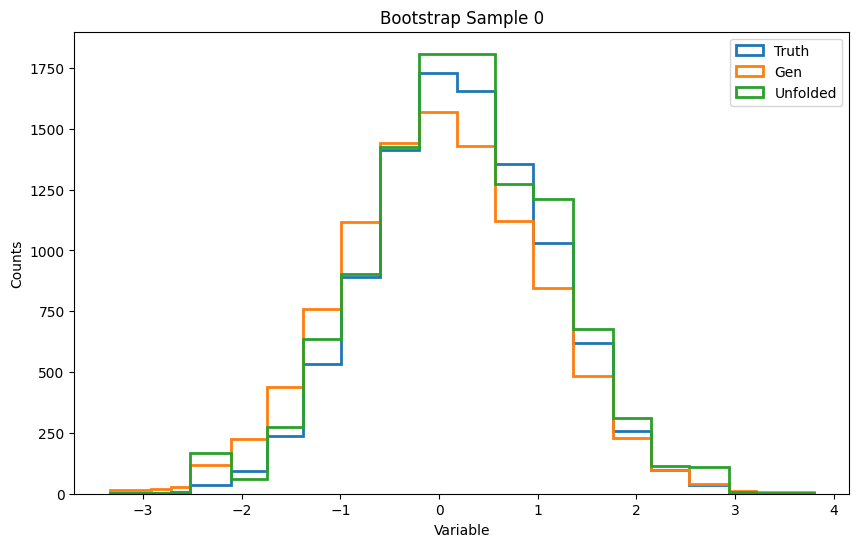

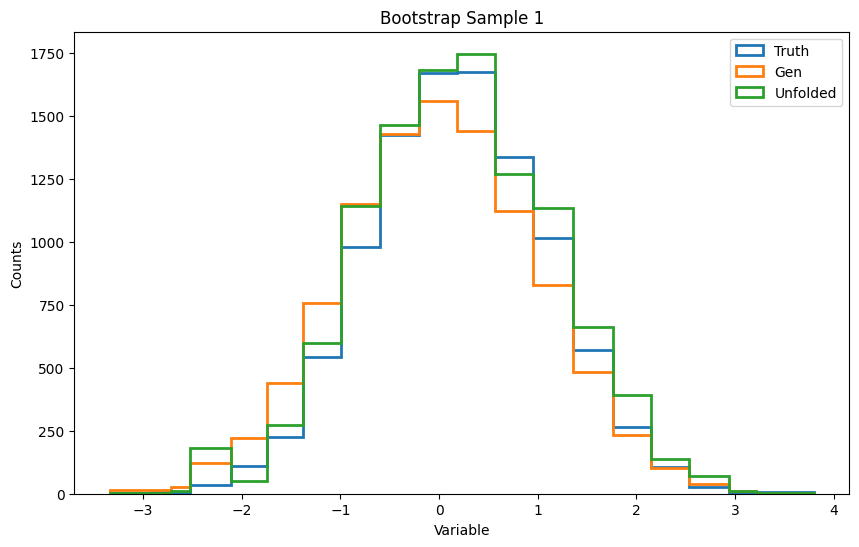

In [18]:
sample_indices = np.random.
for idx in sample_indices:
    # Load data from the .npz file
    file_path = os.path.join(output_dir, f'sample-{idx:04d}.npz')
    with np.load(file_path) as data_file:
        truth_i = data_file['truth']
        gen_i = data_file['gen']
    
    unfolded_i = unfolded_results_last[idx]
    
    # Compute histograms for truth, gen, unfolded results
    truth_hist, _ = np.histogram(truth_i, bins=bins)
    gen_hist, _ = np.histogram(gen_i, bins=bins)
    
    # Plot the histograms
    plt.figure(figsize=(10, 6))
    plt.hist(bin_centers, bins=bins, weights=truth_hist, histtype='step', label='Truth', linewidth=2)
    plt.hist(bin_centers, bins=bins, weights=gen_hist* len(truth_i)/len(gen_i), histtype='step', label='Gen', linewidth=2)
    plt.hist(bin_centers, bins=bins, weights=unfolded_i, histtype='step', label='Unfolded', linewidth=2)
    plt.xlabel('Variable')
    plt.ylabel('Counts')
    plt.title(f'Bootstrap Sample {idx}')
    plt.legend()
    plt.show()

In [9]:
'IMPLEMENTATION'
unfolded_results = np.empty((n_bootstraps, n_iterations, n_bins))
for i in range(n_bootstraps):
    unfolded_results[i] = iterative_bayesian_unfolding(data[i], gen[i], sim[i], bins, n_iterations)
unfolded_results_last = unfolded_results[:, -1]

cov = np.cov(unfolded_results_last.T)
cov_diag = np.diag(cov)

fitted_params = np.empty((n_bootstraps, 3))
fitted_params_diag = np.zeros((n_bootstraps, 3))
intervals = np.empty((n_bootstraps, 3))
intervals_diag = np.empty((n_bootstraps, 3))

NameError: name 'data' is not defined

In [87]:
for i in range(n_bootstraps):
    c = cost.ExtendedBinnedNLL(unfolded_results_last[i], bins, density)
    m = Minuit(c, A = 0.4, mu = 0, var = 1)
    m.limits['var'] = (epsilon, np.inf)
    m.migrad()
    assert m.valid
    fitted_params_diag[i] = m.values
    intervals_diag = m.errors

In [88]:
m.params

,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed
0,A,0.9,1.1,,,,,
1,mu,0.2,0.9,,,,,
2,var,0.8,1.0,,,1E-08,,


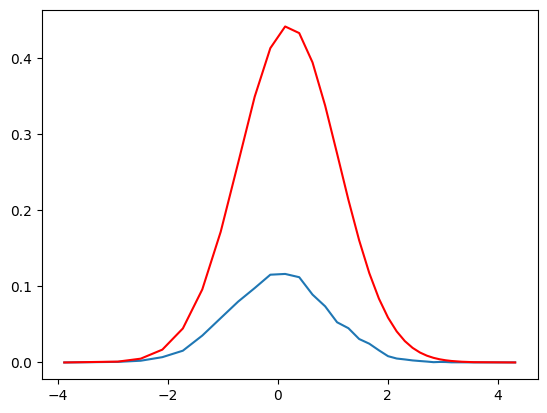

In [92]:
plt.plot(bin_centers,unfolded_results_last[5])
plt.plot(bin_centers, 0.9/0.9*norm.pdf(bin_centers, 0.2, 0.9), color = 'red')

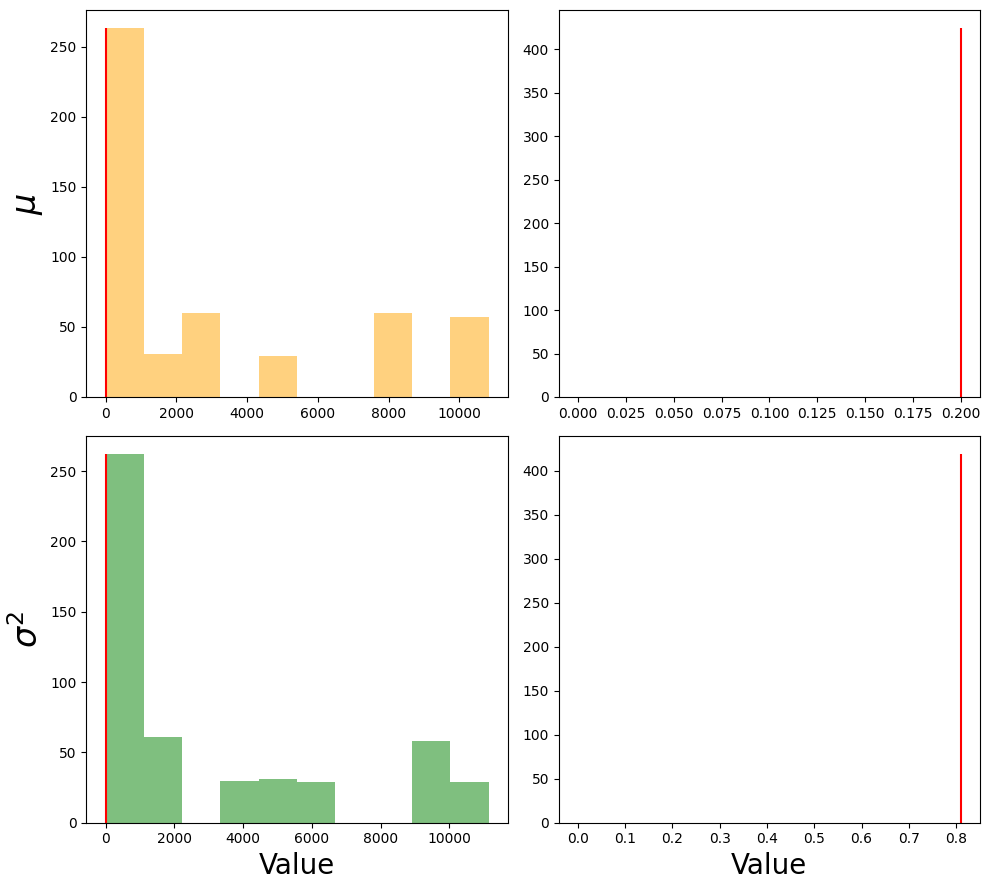

In [7]:
fig, ax = plt.subplots(2, 2, figsize=(10, 9))

# Plot for mu with full covariance
h, _, _ = ax[0, 0].hist(fitted_params[:, 0], label="mu full cov", color='orange', alpha=0.5)
ax[0, 0].vlines(mu_true, 0, h.max(), color='r')
ax[0, 0].set_ylabel("$\\mu$", fontsize=24)

# Plot for mu with diagonal covariance
h, _, _ = ax[0, 1].hist(fitted_params_diag[:, 0], label="mu diag cov", color='b', alpha=0.5)
ax[0, 1].vlines(mu_true, 0, h.max(), color='r')

# Plot for variance with full covariance
h, _, _ = ax[1, 0].hist(fitted_params[:, 1], label="var full cov", color='g', alpha=0.5)
ax[1, 0].vlines(var_true, 0, h.max(), color='r')
ax[1, 0].set_ylabel("$\\sigma^2$", fontsize=24)

# Plot for variance with diagonal covariance
h, _, _ = ax[1, 1].hist(fitted_params_diag[:, 1], label="var diag cov", color='brown', alpha=0.5)
ax[1, 1].vlines(var_true, 0, h.max(), color='r', label='Truth')

# Add labels to the x-axis for the bottom plots
ax[1, 0].set_xlabel("Value", fontsize=20)
ax[1, 1].set_xlabel("Value", fontsize=20)

plt.tight_layout()
plt.savefig('figures/good.pdf', bbox_inches='tight')
plt.show()